# Previsão de Desempenho de Jogadores para Ligas de Futebol

Nome: David Machado Couto Bezerra
Matricula: 475664

dataset: https://www.kaggle.com/datasets/hugomathien/soccer

O objetivo deste trabalho prático é desenvolver um modelo de aprendizado de máquina capaz de prever o overall rating e potencial de jogadores do jogo FIFA, com base em dados históricos disponíveis no Banco de Dados de Futebol Europeu.

O conjunto de dados utilizado para treinar e avaliar o modelo é composto por informações de diversos países e ligas, como estatísticas de jogos, atributos dos jogadores e características das equipes. O objetivo é explorar esses dados para construir um modelo confiável e preciso na previsão do desempenho dos jogadores e times.

Este trabalho utiliza a linguagem de programação Python e a biblioteca Scikit-learn para a implementação do modelo de regressão, bem como as bibliotecas Pandas e Matplotlib para a análise e visualização dos dados.


In [71]:
#   Importing the necessary libraries/modules.

import sqlite3
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#   Ignoring any FutureWarning messages.

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Estabelecendo uma conexão com o banco de dados usando SQLite e Python:
Após estabelecer a conexão, é criado um objeto cursor. Esse objeto nos permite executar as consultas e operações no banco de dados. Podemos pensar no cursor como uma espécie de "apontador" que nos permite percorrer e manipular os dados dentro do banco de dados

In [72]:
connection=sqlite3.connect("/content/drive/MyDrive/Colab Notebooks/Trabalho Final - ML/database.sqlite")   #   Establishing a connection with the database.
cursor=connection.cursor()  #   Creating a cursor object to execute queries.

Executam uma consulta para obter informações da tabela "Player" no banco de dados SQLite. O resultado é armazenado em um DataFrame do pandas para facilitar a manipulação e análise dos dados.

In [73]:
query = "SELECT COUNT(*) FROM Player;"
result = cursor.execute(query)
max_limit = result.fetchone()[0]

query = f"SELECT * FROM Player LIMIT {max_limit};"
players_df = pd.read_sql_query(query, connection)

Executam uma consulta para obter informações da tabela "Player_Attributes" no banco de dados SQLite. O resultado é armazenado em um DataFrame do pandas para facilitar a manipulação e análise dos dados.

In [74]:
query = "SELECT COUNT(*) FROM Player_Attributes;"
result = cursor.execute(query)
max_limit = result.fetchone()[0]

query = f"SELECT * FROM Player_Attributes LIMIT {max_limit};"
df_stats = pd.read_sql_query(query, connection)
df_stats

id  player_fifa_api_id  player_api_id                 date  \
0            1              218353         505942  2016-02-18 00:00:00   
1            2              218353         505942  2015-11-19 00:00:00   
2            3              218353         505942  2015-09-21 00:00:00   
3            4              218353         505942  2015-03-20 00:00:00   
4            5              218353         505942  2007-02-22 00:00:00   
...        ...                 ...            ...                  ...   
183973  183974              102359          39902  2009-08-30 00:00:00   
183974  183975              102359          39902  2009-02-22 00:00:00   
183975  183976              102359          39902  2008-08-30 00:00:00   
183976  183977              102359          39902  2007-08-30 00:00:00   
183977  183978              102359          39902  2007-02-22 00:00:00   

        overall_rating  potential preferred_foot attacking_work_rate  \
0                 67.0       71.0          right              medium   
1                 67.0       71.0          right              medium   
2                 62.0       66.0          right              medium   
3                 61.0       65.0          right              medium   
4                 61.0       65.0          right              medium   
...                ...        ...            ...                 ...   
183973            83.0       85.0          right              medium   
183974            78.0       80.0          right              medium   
183975            77.0       80.0          right              medium   
183976            78.0       81.0          right              medium   
183977            80.0       81.0          right              medium   

       defensive_work_rate  crossing  ...  vision  penalties  marking  \
0                   medium      49.0  ...    54.0       48.0     65.0   
1                   medium      49.0  ...    54.0       48.0     65.0   
2                   medium      49.0  ...    54.0       48.0     65.0   
3                   medium      48.0  ...    53.0       47.0     62.0   
4                   medium      48.0  ...    53.0       47.0     62.0   
...                    ...       ...  ...     ...        ...      ...   
183973                 low      84.0  ...    88.0       83.0     22.0   
183974                 low      74.0  ...    88.0       70.0     32.0   
183975                 low      74.0  ...    88.0       70.0     32.0   
183976                 low      74.0  ...    88.0       53.0     28.0   
183977                 low      74.0  ...    88.0       53.0     38.0   

        standing_tackle  sliding_tackle  gk_diving  gk_handling  gk_kicking  \
0                  69.0            69.0        6.0         11.0        10.0   
1                  69.0            69.0        6.0         11.0        10.0   
2                  66.0            69.0        6.0         11.0        10.0   
3                  63.0            66.0        5.0         10.0         9.0   
4                  63.0            66.0        5.0         10.0         9.0   
...                 ...             ...        ...          ...         ...   
183973             31.0            30.0        9.0         20.0        84.0   
183974             31.0            30.0        9.0         20.0        73.0   
183975             31.0            30.0        9.0         20.0        73.0   
183976             32.0            30.0        9.0         20.0        73.0   
183977             32.0            30.0        9.0          9.0        78.0   

        gk_positioning  gk_reflexes  
0                  8.0          8.0  
1                  8.0          8.0  
2                  8.0          8.0  
3                  7.0          7.0  
4                  7.0          7.0  
...                ...          ...  
183973            20.0         20.0  
183974            20.0         20.0  
183975            20.0         20.0  
183976            20.0         20.0  
183977        

realiza o tratamento dos dados dos DataFrames "players_df" e "df_stats" e os une em um único DataFrame chamado "df". Primeiramente, é feito um merge entre os dois DataFrames usando a coluna "player_api_id" como chave de junção.

Em seguida, são removidas as colunas irrelevantes para a análise, como 'player_fifa_api_id_x', 'player_fifa_api_id_y', 'player_api_id', 'id_x' e 'id_y', utilizando o método "drop" com o parâmetro "axis=1" para indicar que as colunas serão removidas. Para lidar com valores ausentes, é utilizado o método "dropna()" para remover quaisquer linhas que contenham dados faltantes.

Os campos de data 'birthday' e 'date' são convertidos para o formato de data e hora utilizando o método "pd.to_datetime()". Em seguida, é calculada a idade dos jogadores subtraindo a data de nascimento ('birthday') da data de referência ('date') e convertendo o resultado para o formato de anos completos. O DataFrame resultante contém os dados tratados e adiciona uma nova coluna chamada 'age', representando a idade dos jogadores.

In [144]:
df = pd.merge(players_df, df_stats, on='player_api_id', how='inner')

# Drop irrelevant columns
df = df.drop(['player_fifa_api_id_x', 'player_fifa_api_id_y', 'player_api_id', 'id_x', 'id_y'], axis=1)

# Handle missing values
df = df.dropna()

# Convert birthday to datetime format
df['birthday'] = pd.to_datetime(df['birthday'])
df['date'] = pd.to_datetime(df['date'])
df['age'] = (df['date'] - df['birthday']).astype('<m8[Y]')
df

<ipython-input-144-d7cad854275c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birthday'] = pd.to_datetime(df['birthday'])


player_name   birthday  height  weight       date  \
0       Aaron Appindangoye 1992-02-29  182.88     187 2016-02-18   
1       Aaron Appindangoye 1992-02-29  182.88     187 2015-11-19   
2       Aaron Appindangoye 1992-02-29  182.88     187 2015-09-21   
3       Aaron Appindangoye 1992-02-29  182.88     187 2015-03-20   
4       Aaron Appindangoye 1992-02-29  182.88     187 2007-02-22   
...                    ...        ...     ...     ...        ...   
183973  Zvjezdan Misimovic 1982-06-05  180.34     176 2009-08-30   
183974  Zvjezdan Misimovic 1982-06-05  180.34     176 2009-02-22   
183975  Zvjezdan Misimovic 1982-06-05  180.34     176 2008-08-30   
183976  Zvjezdan Misimovic 1982-06-05  180.34     176 2007-08-30   
183977  Zvjezdan Misimovic 1982-06-05  180.34     176 2007-02-22   

        overall_rating  potential preferred_foot attacking_work_rate  \
0                 67.0       71.0          right              medium   
1                 67.0       71.0          right              medium   
2                 62.0       66.0          right              medium   
3                 61.0       65.0          right              medium   
4                 61.0       65.0          right              medium   
...                ...        ...            ...                 ...   
183973            83.0       85.0          right              medium   
183974            78.0       80.0          right              medium   
183975            77.0       80.0          right              medium   
183976            78.0       81.0          right              medium   
183977            80.0       81.0          right              medium   

       defensive_work_rate  ...  penalties  marking  standing_tackle  \
0                   medium  ...       48.0     65.0             69.0   
1                   medium  ...       48.0     65.0             69.0   
2                   medium  ...       48.0     65.0             66.0   
3                   medium  ...       47.0     62.0             63.0   
4                   medium  ...       47.0     62.0             63.0   
...                    ...  ...        ...      ...              ...   
183973                 low  ...       83.0     22.0             31.0   
183974                 low  ...       70.0     32.0             31.0   
183975                 low  ...       70.0     32.0             31.0   
183976                 low  ...       53.0     28.0             32.0   
183977                 low  ...       53.0     38.0             32.0   

        sliding_tackle  gk_diving  gk_handling  gk_kicking  gk_positioning  \
0                 69.0        6.0         11.0        10.0             8.0   
1                 69.0        6.0         11.0        10.0             8.0   
2                 69.0        6.0         11.0        10.0             8.0   
3                 66.0        5.0         10.0         9.0             7.0   
4                 66.0        5.0         10.0         9.0             7.0   
...                ...        ...          ...         ...             ...   
183973            30.0        9.0         20.0        84.0            20.0   
183974            30.0        9.0         20.0        73.0            20.0   
183975            30.0        9.0         20.0        73.0            20.0   
183976            30.0        9.0         20.0        73.0            20.0   
183977            30.0        9.0          9.0        78.0             7.0   

        gk_reflexes   age  
0               8.0  23.0  
1               8.0  23.0  
2               8.0  23.0  
3               7.0  23.0  
4               7.0  14.0  
...             ...   ...  
183973         20.0  27.0  
183974         20.0  26.0  
183975         20.0  26.0  
183976         20.0  25.0  
183977         15.0  24.0  

[180354 rows x 44 columns]

Escolhendo o jogador do dataset

In [142]:
player_df = df[df['player_name'] == 'Romelu Lukaku']
player_df['ID'] = np.arange(player_df.shape[0], 0, -1)
player_df

<ipython-input-142-90dcee6ba18f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['ID'] = np.arange(player_df.shape[0], 0, -1)


player_name   birthday  height  weight       date  overall_rating  \
153168  Romelu Lukaku 1993-05-13   190.5     207 2016-01-28            82.0   
153169  Romelu Lukaku 1993-05-13   190.5     207 2015-12-10            81.0   
153170  Romelu Lukaku 1993-05-13   190.5     207 2015-11-26            80.0   
153171  Romelu Lukaku 1993-05-13   190.5     207 2015-09-21            80.0   
153172  Romelu Lukaku 1993-05-13   190.5     207 2015-05-29            80.0   
153173  Romelu Lukaku 1993-05-13   190.5     207 2015-05-22            79.0   
153174  Romelu Lukaku 1993-05-13   190.5     207 2015-05-15            79.0   
153175  Romelu Lukaku 1993-05-13   190.5     207 2015-05-08            80.0   
153176  Romelu Lukaku 1993-05-13   190.5     207 2015-05-01            80.0   
153177  Romelu Lukaku 1993-05-13   190.5     207 2015-04-10            80.0   
153178  Romelu Lukaku 1993-05-13   190.5     207 2015-03-13            80.0   
153179  Romelu Lukaku 1993-05-13   190.5     207 2015-02-27            80.0   
153180  Romelu Lukaku 1993-05-13   190.5     207 2015-02-13            80.0   
153181  Romelu Lukaku 1993-05-13   190.5     207 2014-09-18            80.0   
153182  Romelu Lukaku 1993-05-13   190.5     207 2014-07-18            80.0   
153183  Romelu Lukaku 1993-05-13   190.5     207 2013-12-13            80.0   
153184  Romelu Lukaku 1993-05-13   190.5     207 2013-11-29            80.0   
153185  Romelu Lukaku 1993-05-13   190.5     207 2013-11-22            79.0   
153186  Romelu Lukaku 1993-05-13   190.5     207 2013-11-15            80.0   
153187  Romelu Lukaku 1993-05-13   190.5     207 2013-11-01            79.0   
153188  Romelu Lukaku 1993-05-13   190.5     207 2013-10-25            78.0   
153189  Romelu Lukaku 1993-05-13   190.5     207 2013-10-18            78.0   
153190  Romelu Lukaku 1993-05-13   190.5     207 2013-09-20            77.0   
153191  Romelu Lukaku 1993-05-13   190.5     207 2013-07-12            77.0   
153192  Romelu Lukaku 1993-05-13   190.5     207 2013-06-07            77.0   
153193  Romelu Lukaku 1993-05-13   190.5     207 2013-05-31            77.0   
153194  Romelu Lukaku 1993-05-13   190.5     207 2013-05-03            77.0   
153195  Romelu Lukaku 1993-05-13   190.5     207 2013-04-19            77.0   
153196  Romelu Lukaku 1993-05-13   190.5     207 2013-03-22            77.0   
153197  Romelu Lukaku 1993-05-13   190.5     207 2013-03-08            77.0   
153198  Romelu Lukaku 1993-05-13   190.5     207 2013-03-01            76.0   
153199  Romelu Lukaku 1993-05-13   190.5     207 2013-02-22            74.0   
153200  Romelu Lukaku 1993-05-13   190.5     207 2013-02-15            74.0   
153201  Romelu Lukaku 1993-05-13   190.5     207 2012-08-31            74.0   
153202  Romelu Lukaku 1993-05-13   190.5     207 2012-02-22            75.0   
153203  Romelu Lukaku 1993-05-13   190.5     207 2011-08-30            78.0   
153204  Romelu Lukaku 1993-05-13   190.5     207 2011-02-22            74.0   
153205  Romelu Lukaku 1993-05-13   190.5     207 2010-08-30            74.0   
153206  Romelu Lukaku 1993-05-13   190.5     207 2007-02-22            74.0   

        potential preferred_foot attacking_work_rate defensive_work_rate  ...  \
153168       88.0           left              medium              medium  ...   
153169       87.0           left              medium              medium  ...   
153170       86.0           left              medium              medium  ...   
153171       86.0           left              medium              medium  ...   
153172       86.0           left              medium              medium  ...   
153173       84.0           left              medium              medium  ...   
153174       85.0           left              medium              medium  ...   
153175       85.0           left              medium              medium  ...   
153176       85.0           left              medium              medium  ...   
153177       85.0           left       

realizado um treinamento de um regressor de floresta aleatória para prever a pontuação geral de jogadores de futebol com base em três variáveis: idade, ID e potencial. Os dados são divididos em conjuntos de treinamento e teste, e o modelo é treinado usando o conjunto de treinamento. Em seguida, são feitas previsões para o conjunto de teste. Métricas de erro, como erro médio quadrático, erro médio absoluto e coeficiente de determinação (R²), são calculadas para avaliar o desempenho do modelo. Por fim, é criado um gráfico que compara as pontuações gerais reais e previstas em relação ao índice dos dados (ID dos jogadores).

Mean Squared Error: 0.4395299999999963
Mean Absolute Error: 0.470999999999998
R^2 Score: 0.9343004484304938


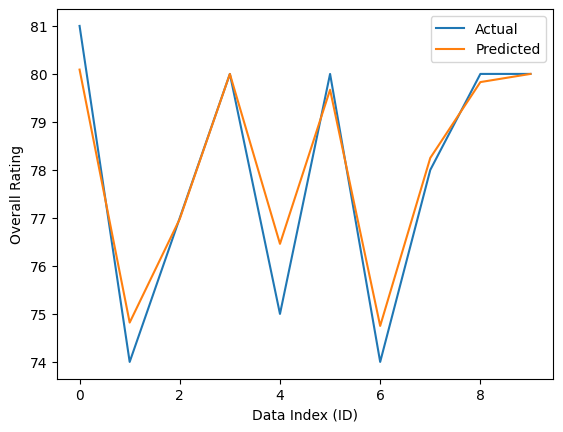

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Prepare the features and targets
features = ['age', 'ID', 'potential']
target = 'overall_rating'

# Extract features and target variable from the dataset
X = player_df[features]
y = player_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=83)

# Train the Random Forest regressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Compute the error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the error metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

# Create an array of indices for the x-axis
x_axis = np.arange(len(y_test))

# Plot the predicted and actual overall ratings
plt.plot(x_axis, y_test.values, label='Actual')
plt.plot(x_axis, y_pred, label='Predicted')
plt.xlabel('Data Index (ID)')
plt.ylabel('Overall Rating')
plt.legend()
plt.show()


Neste código, é utilizado um regressor de floresta aleatória treinado anteriormente para fazer previsões de potencial e pontuação geral para uma série de novos IDs de jogadores. São fornecidos os próximos 11 IDs desejados. Em seguida, é criado um DataFrame contendo esses IDs juntamente com valores constantes de idade e potencial, com base nos valores existentes no conjunto de dados original. As previsões são feitas para esses novos IDs e, em seguida, são plotados gráficos separados para o potencial e a pontuação geral previstos, com os IDs no eixo x. Isso permite visualizar as previsões para os próximos jogadores com base no modelo treinado.

[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


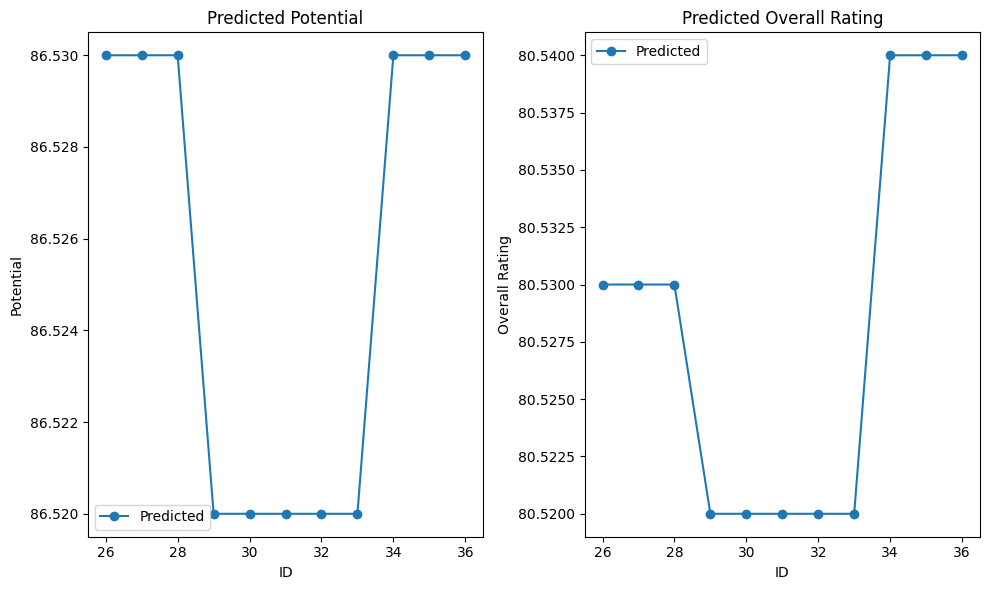

In [143]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X, y)

next_IDs = [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
print(next_IDs)

# Create next_data with constant age and potential values
age = player_df['age'].iloc[0]
potential = player_df['potential'].iloc[0]
next_data = pd.DataFrame({'age': [age] * 11,
                          'ID': next_IDs,
                          'potential': [potential] * 11})

# Step 4: Make Predictions for the next 11 ID values
y_pred = rf_regressor.predict(next_data)

# Step 5: Plot the Results
plt.figure(figsize=(10, 6))

# Plot for Potential
plt.subplot(1, 2, 1)
plt.plot(next_IDs, y_pred[:, 1], 'o-', label='Predicted')
plt.xlabel('ID')
plt.ylabel('Potential')
plt.title('Predicted Potential')
plt.legend()

# Plot for Overall Rating
plt.subplot(1, 2, 2)
plt.plot(next_IDs, y_pred[:, 0], 'o-', label='Predicted')
plt.xlabel('ID')
plt.ylabel('Overall Rating')
plt.title('Predicted Overall Rating')
plt.legend()

plt.tight_layout()
plt.show()